In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns

In [2]:
df=pd.read_csv("Downloads/train.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Data Cleaning

In [4]:
df.info() #general information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
null_count=df["Postal Code"].isnull().sum()
null_count

11

In [6]:
df.loc[df["Postal Code"].isnull()]
#We notice where postal code is null, the state="Vermont". Hence, we fill the null values with zero.

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [7]:
df["Postal Code"].fillna(0,inplace=True)

In [8]:
null_count1=df["Postal Code"].isnull().sum()
null_count1  #Hence, null values removed.

0

In [9]:
df["Postal Code"]=df["Postal Code"].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [11]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [12]:
#checking for duplicates
if df.duplicated().sum()>0:
    print("Duplicates present")
else:
    print("Duplicates aren't there!")

Duplicates aren't there!


# Customer analysis

In [13]:
#different types of customers
print(df["Segment"].unique())
print(df["Segment"].value_counts())

['Consumer' 'Corporate' 'Home Office']
Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64


Text(0.5, 1.0, 'DISTRIBUTION OF CUSTOMERS')

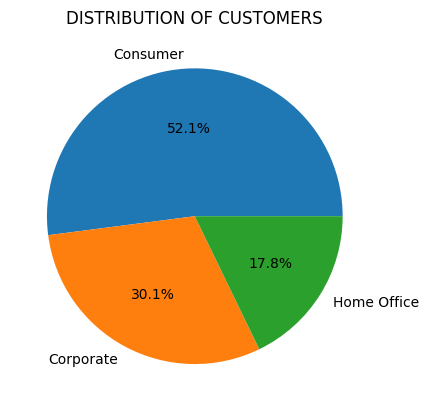

In [14]:
plt.pie(df["Segment"].value_counts(),labels=df["Segment"].unique(),autopct="%1.1f%%")
plt.title("DISTRIBUTION OF CUSTOMERS")

In [15]:
sales_per_category = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_category = sales_per_category.rename(columns={"Segment":"Customer Type", "Sales":"Total Sales"})
print(sales_per_category)

  Customer Type   Total Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


Text(0.5, 1.0, 'SALES PER CATEGORY OF CUSTOMERS')

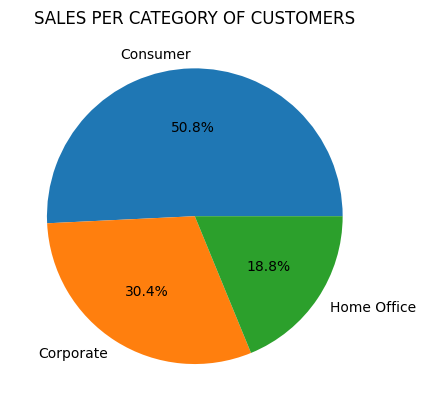

In [16]:
plt.pie(sales_per_category["Total Sales"],labels=sales_per_category["Customer Type"],autopct="%1.1f%%")
plt.title("SALES PER CATEGORY OF CUSTOMERS")

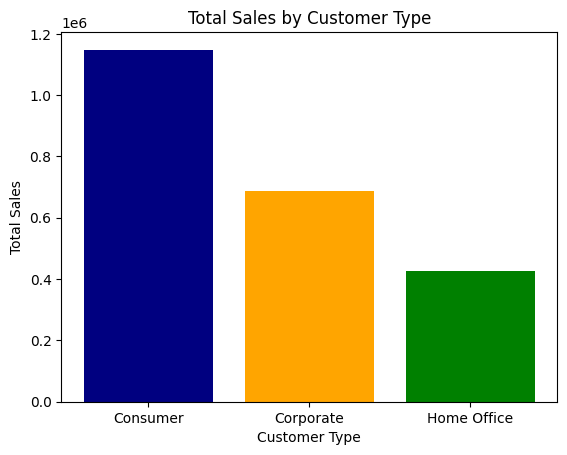

In [17]:

# Creating a bar chart
plt.bar(sales_per_category["Customer Type"], sales_per_category["Total Sales"], color=["navy", "orange", "green"])
plt.title("Total Sales by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")
plt.show()

# Customer Loyalty

In [18]:
cust_frequency=df.groupby(["Customer ID","Customer Name","Segment"])["Order ID"].count().reset_index()
cust_frequency.rename(columns={"Order ID":"Total Orders"},inplace=True)
cust_frequency

,Customer ID,Customer Name,Segment,Total Orders
0,AA-10315,Alex Avila,Consumer,11
1,AA-10375,Allen Armold,Consumer,15
2,AA-10480,Andrew Allen,Consumer,12
3,AA-10645,Anna Andreadi,Consumer,18
4,AB-10015,Aaron Bergman,Consumer,6
...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,28
789,YC-21895,Yoseph Carroll,Corporate,8
790,YS-21880,Yana Sorensen,Corporate,12
791,ZC-21910,Zuschuss Carroll,Consumer,31


In [19]:
repeat_cust=cust_frequency[cust_frequency["Total Orders"]>=1]
repeat_cust_sorted= repeat_cust.sort_values(by="Total Orders",ascending= False)
repeat_cust_sorted.head(10).reset_index(drop=True)

,Customer ID,Customer Name,Segment,Total Orders
0,WB-21850,William Brown,Consumer,35
1,PP-18955,Paul Prost,Home Office,34
2,MA-17560,Matt Abelman,Home Office,34
3,JL-15835,John Lee,Consumer,33
4,CK-12205,Chloris Kastensmidt,Consumer,32
5,SV-20365,Seth Vernon,Consumer,32
6,JD-15895,Jonathan Doherty,Corporate,32
7,AP-10915,Arthur Prichep,Consumer,31
8,ZC-21910,Zuschuss Carroll,Consumer,31
9,EP-13915,Emily Phan,Consumer,31


In [20]:
repeat_cust.groupby("Segment")['Total Orders'].count()


Segment
Consumer       409
Corporate      236
Home Office    148
Name: Total Orders, dtype: int64

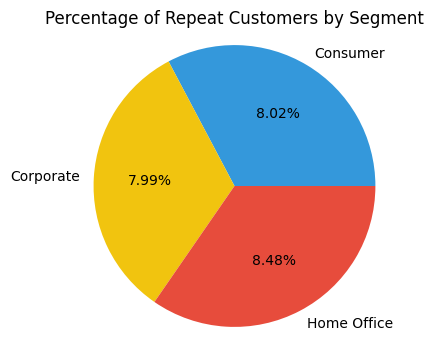

In [21]:

# Calculating the percentage of repeat customers for each segment
repeat_pct = repeat_cust.groupby("Segment")['Total Orders'].count() / df["Segment"].value_counts() * 100

plt.figure(figsize=(4,4))
plt.pie(repeat_pct, labels=repeat_pct.index, 
        autopct=lambda p : '{:.2f}%'.format(p * sum(repeat_pct)/100), 
        colors=['#3498db', '#f1c40f', '#e74c3c'])
plt.axis('equal')  # Ensure the pie chart is drawn as a circle
plt.title("Percentage of Repeat Customers by Segment")

plt.show()

# **Note:**

Though the highest number of customers are from the "Consumer" segment, the maximum number of repeat customers are from the "Home office" segment.

In [22]:
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()
top_spenders = customer_sales.sort_values(by='Sales', ascending=False)
print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


# Shipping

In [23]:
# Types of Shipping methods 

types_of_shipping = df['Ship Mode'].unique()
print(types_of_shipping)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [24]:
# Frequency of use of a shipping methods 

shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={'index':'Mode_of_Shipment', 'Ship Mode': 'Use Frequency'})

print(shipping_model)

  Mode_of_Shipment  Use Frequency
0   Standard Class           5859
1     Second Class           1902
2      First Class           1501
3         Same Day            538


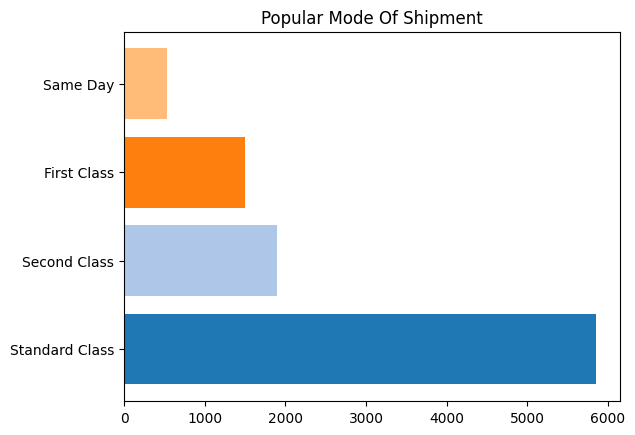

In [25]:
# Plotting a horizontal bar chart
plt.barh(shipping_model['Mode_of_Shipment'], shipping_model['Use Frequency'], color=plt.cm.tab20(range(len(shipping_model))))
plt.title('Popular Mode Of Shipment')
plt.show()

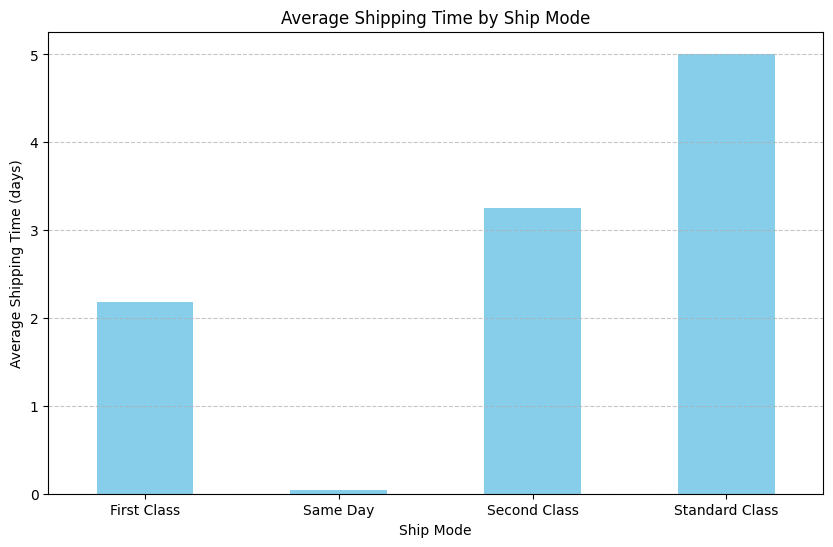

In [26]:

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Calculate shipping time in days
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Calculate average shipping time for each Ship Mode
average_shipping_time = df.groupby('Ship Mode')['Shipping Time'].mean()

# Plot the bar graph for average shipping time
plt.figure(figsize=(10, 6))
average_shipping_time.plot(kind='bar', color='skyblue')
plt.title('Average Shipping Time by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Shipping Time (days)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Geographical analysis

             State  Number_of_customers
0       California                 1946
1         New York                 1097
2            Texas                  973
3     Pennsylvania                  582
4       Washington                  504
5         Illinois                  483
6             Ohio                  454
7          Florida                  373
8         Michigan                  253
9   North Carolina                  247
10        Virginia                  224
11         Arizona                  223
12       Tennessee                  183
13        Colorado                  179
14         Georgia                  177
15        Kentucky                  137
16         Indiana                  135
17   Massachusetts                  135
18          Oregon                  122
19      New Jersey                  122


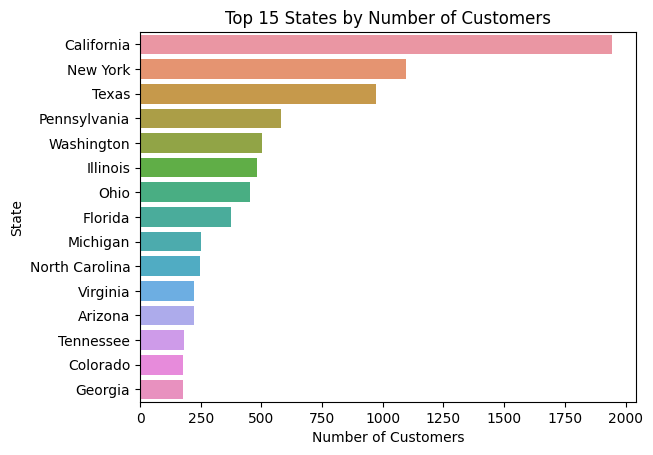

In [27]:
# Customers per state 

state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index':'State', 'State':'Number_of_customers'})

print(state.head(20))
sns.barplot(x="Number_of_customers", y="State", data=state.head(15))

plt.title("Top 15 States by Number of Customers")
plt.xlabel("Number of Customers")
plt.ylabel("State")

plt.show()

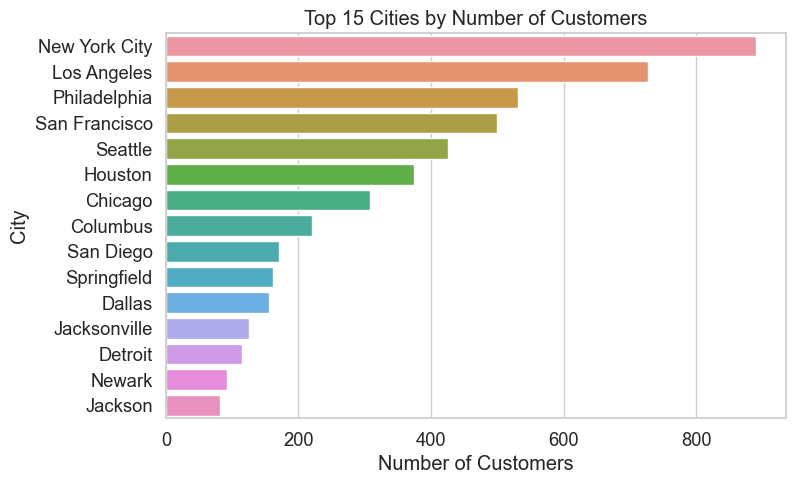

In [28]:

# Customers per city
city_customers = df['City'].value_counts().reset_index()
city_customers = city_customers.rename(columns={'index':'City', 'City':'Number of Customers'})


plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

sns.barplot(x="Number of Customers", y="City", data=city_customers.head(15))

plt.title("Top 15 Cities by Number of Customers")
plt.xlabel("Number of Customers")
plt.ylabel("City")

plt.show()

             State        Sales
0       California  446306.4635
1         New York  306361.1470
2            Texas  168572.5322
3       Washington  135206.8500
4     Pennsylvania  116276.6500
5          Florida   88436.5320
6         Illinois   79236.5170
7         Michigan   76136.0740
8             Ohio   75130.3500
9         Virginia   70636.7200
10  North Carolina   55165.9640
11         Indiana   48718.4000
12         Georgia   48219.1100
13        Kentucky   36458.3900
14         Arizona   35272.6570
15      New Jersey   34610.9720
16        Colorado   31841.5980
17       Wisconsin   31173.4300
18       Tennessee   30661.8730
19       Minnesota   29863.1500


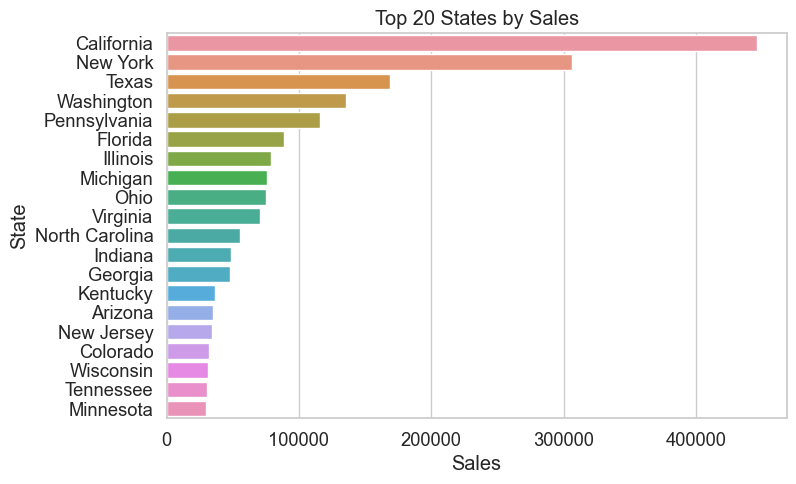

In [29]:
# Sales per state 

import seaborn as sns

state_sales = df.groupby(['State'])['Sales'].sum().reset_index()
top_sales = state_sales.sort_values(by='Sales', ascending=False)
print(top_sales.head(20).reset_index(drop=True))
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

sns.barplot(x="Sales", y="State", data=top_sales.head(20))

plt.title("Top 20 States by Sales")
plt.xlabel("Sales")
plt.ylabel("State")

plt.show()

             City        Sales
0   New York City  252462.5470
1     Los Angeles  173420.1810
2         Seattle  116106.3220
3   San Francisco  109041.1200
4    Philadelphia  108841.7490
5         Houston   63956.1428
6         Chicago   47820.1330
7       San Diego   47521.0290
8    Jacksonville   44713.1830
9         Detroit   42446.9440
10    Springfield   41827.8100
11       Columbus   38662.5630
12         Newark   28448.0490
13       Columbia   25283.3240
14        Jackson   24963.8580
15      Lafayette   24944.2800
16    San Antonio   21843.5280
17     Burlington   21668.0820
18      Arlington   20214.5320
19         Dallas   20127.9482


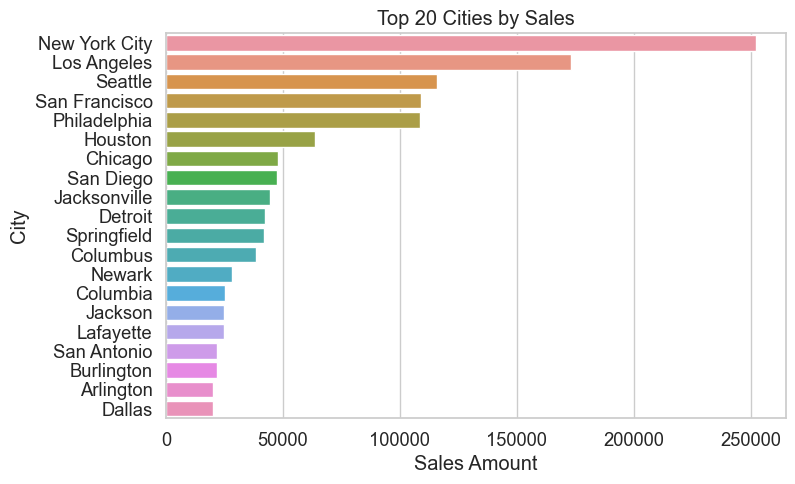

In [30]:
# Sales per city

city_sales = df.groupby(['City'])['Sales'].sum().reset_index()


top_city_sales = city_sales.sort_values(by='Sales', ascending=False)

print(top_city_sales.head(20).reset_index(drop=True))

plt.figure(figsize=(8,5))

sns.barplot(x="Sales", y="City", data=top_city_sales.head(20))
plt.title("Top 20 Cities by Sales")
plt.xlabel("Sales Amount")
plt.ylabel("City")



plt.show()

In [31]:
state_city_sales = df.groupby(['State','City'])['Sales'].sum().reset_index()

print(state_city_sales.head(20))

      State           City      Sales
0   Alabama         Auburn   1766.830
1   Alabama        Decatur   3374.820
2   Alabama       Florence   1997.350
3   Alabama         Hoover    525.850
4   Alabama     Huntsville   2484.370
5   Alabama         Mobile   5462.990
6   Alabama     Montgomery   3722.730
7   Alabama     Tuscaloosa    175.700
8   Arizona       Avondale    946.808
9   Arizona  Bullhead City     22.288
10  Arizona       Chandler   1067.403
11  Arizona        Gilbert   4172.382
12  Arizona       Glendale   2917.865
13  Arizona           Mesa   4037.740
14  Arizona         Peoria   1341.352
15  Arizona        Phoenix  11000.257
16  Arizona     Scottsdale   1466.307
17  Arizona   Sierra Vista     76.072
18  Arizona          Tempe   1070.302
19  Arizona         Tucson   6313.016


# Notes

1) Top cities: New York City,Los Angeles ,Seattle,San Francisco    
2)Top States: California,New York,Texas,Washington  

# Product analysis


In [32]:
 #Types of products in the Stores 

products = df['Category'].value_counts()
print(products)

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64


          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


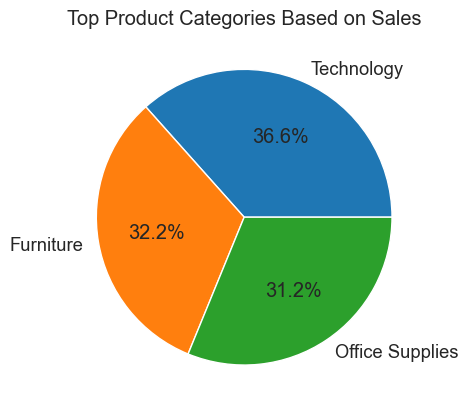

In [33]:
# Group the data by product category versus the sales from each product category 
product_category = df.groupby(['Category'])['Sales'].sum().reset_index()

top_product_category = product_category.sort_values(by='Sales', ascending=False) 
print(top_product_category.reset_index(drop=True))

# Plotting a pie chart 
plt.pie(top_product_category['Sales'], labels=top_product_category['Category'], autopct='%1.1f%%')

plt.title('Top Product Categories Based on Sales')
        
plt.show()

In [34]:
product_subcategory = df['Sub-Category'].unique()
print(product_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [35]:

# Grouping the data by category and subcategory, and sum the sales
category_subcategory_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
category_subcategory_sales 

,Category,Sub-Category,Sales
0,Furniture,Bookcases,113813.1987
1,Furniture,Chairs,322822.7310
2,Furniture,Furnishings,89212.0180
3,Furniture,Tables,202810.6280
4,Office Supplies,Appliances,104618.4030
5,Office Supplies,Art,26705.4100
6,Office Supplies,Binders,200028.7850
7,Office Supplies,Envelopes,16128.0460
8,Office Supplies,Fasteners,3001.9600
9,Office Supplies,Labels,12347.7260


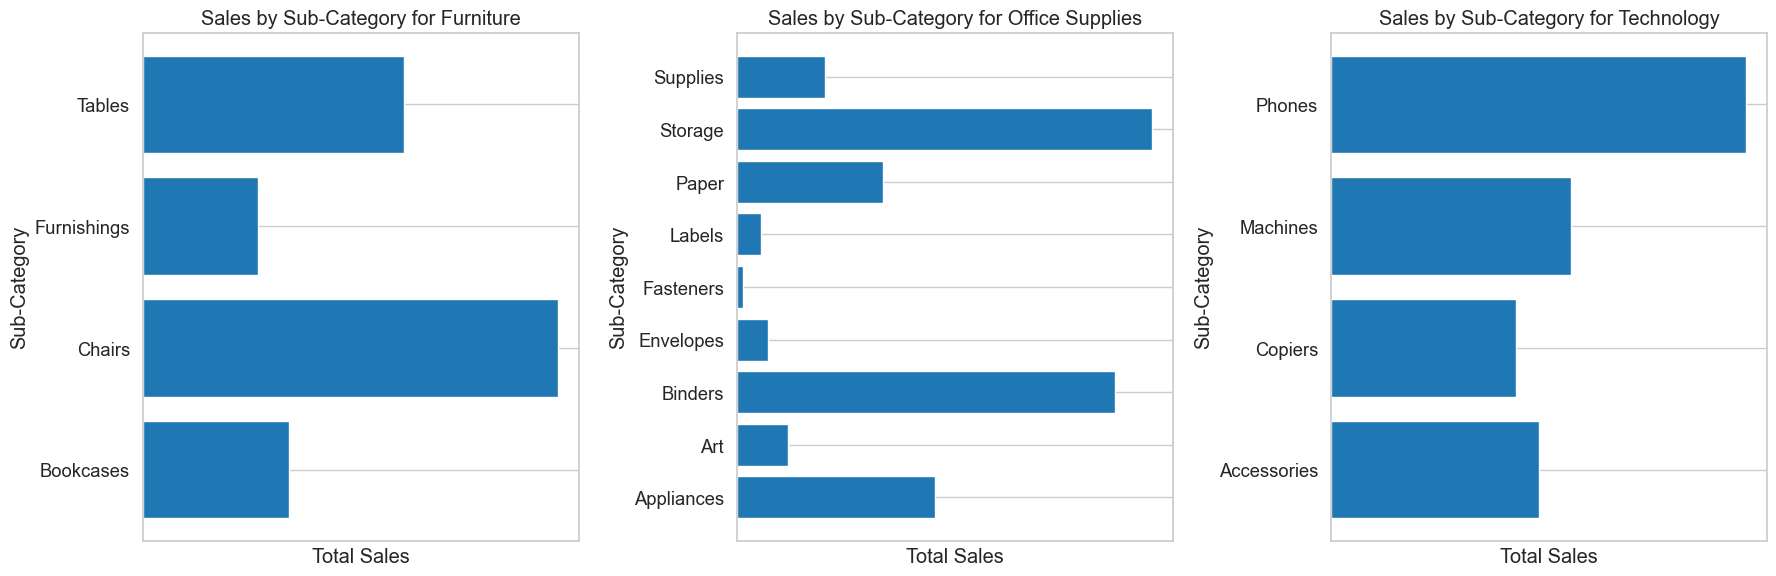

In [36]:


# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Loop through each category
for i, category in enumerate(category_subcategory_sales['Category'].unique()):
    # Filter the data for the current category
    category_data = category_subcategory_sales[category_subcategory_sales['Category'] == category]
    
    # Create a bar chart for the current category
    axs[i].barh(category_data['Sub-Category'], category_data['Sales'])
    axs[i].set_title(f'Sales by Sub-Category for {category}')
    axs[i].set_xlabel('Total Sales')
    axs[i].set_ylabel('Sub-Category')
    axs[i].set_xticks([])  # Remove x-axis ticks

# Remove extra space between subplots
fig.tight_layout()

plt.show()

<Figure size 1200x800 with 0 Axes>

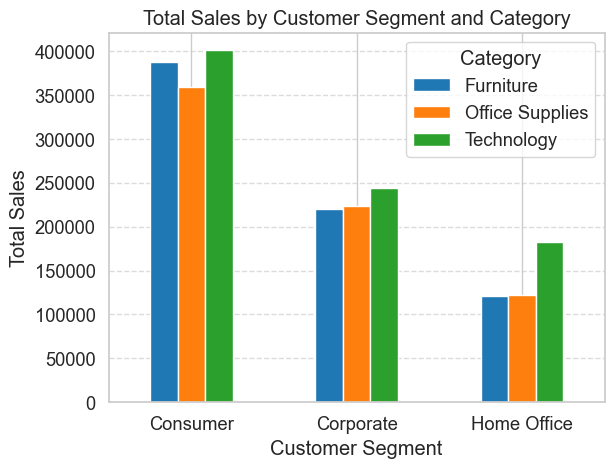

Category       Furniture  Office Supplies  Technology
Segment                                              
Consumer     387696.2580       359352.608  401011.665
Corporate    220321.7018       224130.536  244041.837
Home Office  120640.6159       121939.190  182402.371


In [37]:



# Group by Segment and Category to calculate the total sales for each combination
segment_category_sales = df.groupby(['Segment', 'Category'])['Sales'].sum().unstack()

# Plotting the results
plt.figure(figsize=(12, 8))
segment_category_sales.plot(kind='bar')
plt.title('Total Sales by Customer Segment and Category')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Printing the result for reference
print(segment_category_sales)


# Note:
1) **Technology** product category **leads in sales**.


2)Under technology, sub-category of **phones** drives the major sales.

# Overall sales analysis

In [38]:
#**Focusing on the year 2018** (Most recent data found in the dataset currently used)
# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Filter the data for the year 2018
year_sales = df[df['Order Date'].dt.year == 2018]

# Calculate the monthly sales for 2018
monthly_sales = year_sales.resample('M', on='Order Date')['Sales'].sum()

# Renaming the columns
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date':'Month', 'Sales':'Total Montly Sales'})

# Print the monthly and quarterly sales for 2018
print("Monthly Sales for 2018:")
print(monthly_sales)

Monthly Sales for 2018:
        Month  Total Montly Sales
0  2018-01-31          43476.4740
1  2018-02-28          19920.9974
2  2018-03-31          58863.4128
3  2018-04-30          35541.9101
4  2018-05-31          43825.9822
5  2018-06-30          48190.7277
6  2018-07-31          44825.1040
7  2018-08-31          62837.8480
8  2018-09-30          86152.8880
9  2018-10-31          77448.1312
10 2018-11-30         117938.1550
11 2018-12-31          83030.3888


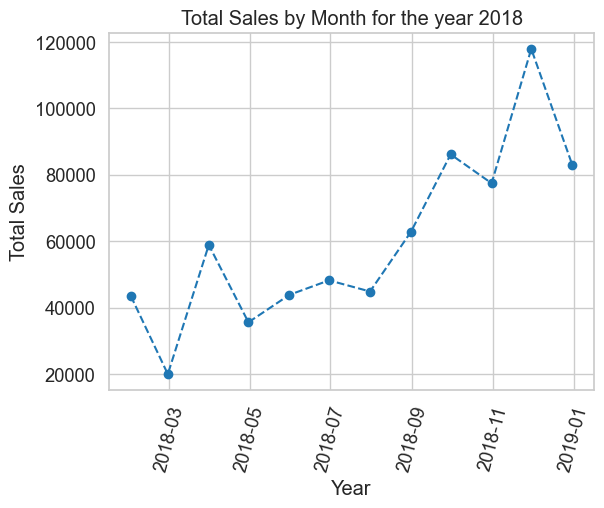

In [39]:
# Create a line graph for total sales by year
plt.plot(monthly_sales['Month'], monthly_sales['Total Montly Sales'], marker='o', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month for the year 2018')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=75)

plt.show()

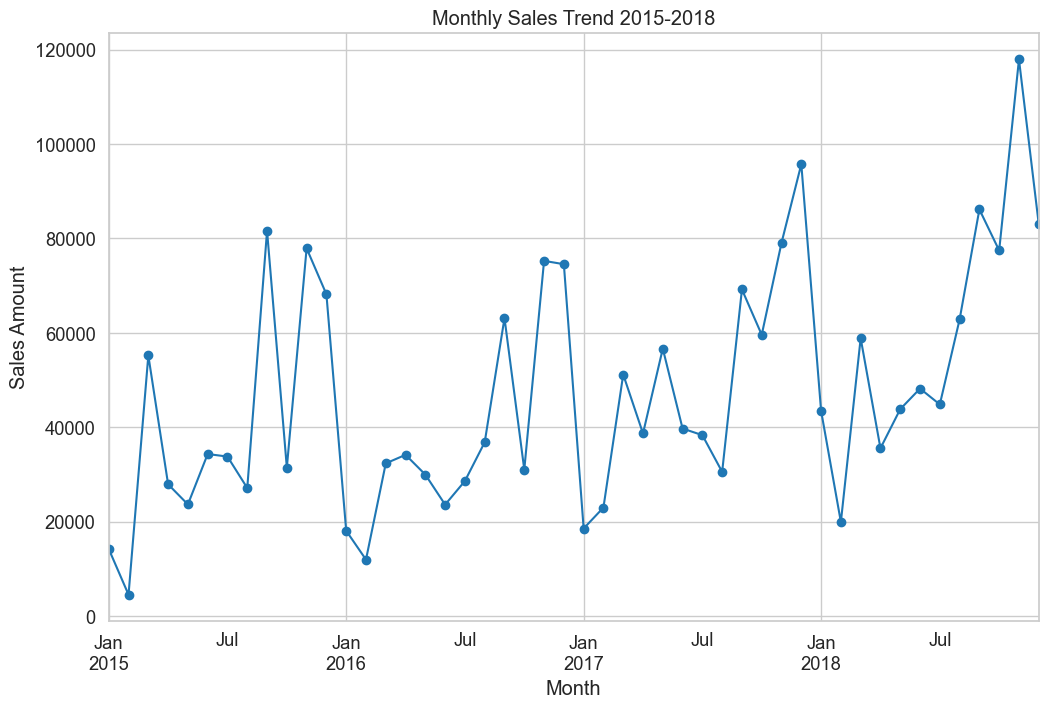

In [40]:

# Group the data by months and calculate the total sales amount for each month
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Plot the sales trends for months
plt.figure(figsize=(12, 26))

# Monthly Sales Trend
plt.subplot(3, 1, 1)
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend 2015-2018')
plt.xlabel('Month')
plt.ylabel('Sales Amount')

# Adjust layout and display the plots
# plt.tight_layout()
plt.show()

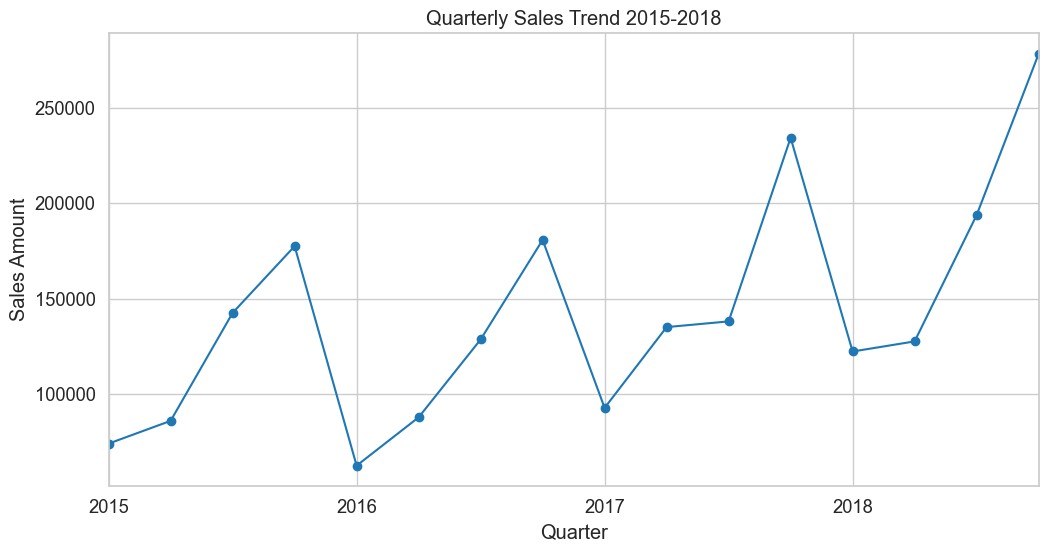

In [41]:

# Group the data by quarters and calculate the total sales amount for each quarter
quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum()

# Plot the sales trends for months, quarters, and years
plt.figure(figsize=(12, 20))

# Quarterly Sales Trend
plt.subplot(3, 1, 2)
quarterly_sales.plot(kind='line', marker='o')
plt.title('Quarterly Sales Trend 2015-2018')
plt.xlabel('Quarter')
plt.ylabel('Sales Amount')

# Adjust layout and display the plots
#plt.tight_layout()
plt.show()

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


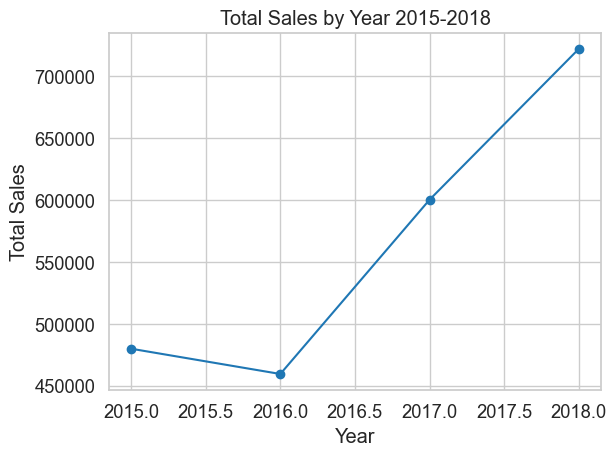

In [42]:
# Converting the "Order Date" column to datetime format

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Grouping the data by years and calculate the total sales amount for each year
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()

yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date': 'Year', 'Sales':'Total Sales'})

print(yearly_sales)

# Create a line graph for total sales by year
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year 2015-2018')

# Display the plot
plt.tight_layout()

plt.show()

In [43]:

import calendar

# Convert 'Order Date' to datetime format for easier filtering and analysis
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Extract year and month from 'Order Date' for aggregation
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group by Year and Month to get monthly sales across all years
monthly_sales_all_years = df.groupby(['Year', 'Month'])['Sales'].sum().unstack(level=0)

# Calculate the mean sales for each month across all years
mean_monthly_sales = monthly_sales_all_years.mean(axis=1)

# Identify months with consistently lower sales
# Let's consider a month with below-average sales as a month with a drop
average_sales = mean_monthly_sales.mean()
months_with_drops = mean_monthly_sales[mean_monthly_sales < average_sales]

# Map month numbers to names
monthly_sales_all_years.index = monthly_sales_all_years.index.map(lambda x: calendar.month_name[x])
mean_monthly_sales.index = mean_monthly_sales.index.map(lambda x: calendar.month_name[x])
months_with_drops.index = months_with_drops.index.map(lambda x: calendar.month_name[x])

# Display the results
print("Monthly Sales Across All Years:\n", monthly_sales_all_years)
print("\nMean Monthly Sales:\n", mean_monthly_sales)
print("\nMonths with Consistently Lower Sales:\n", months_with_drops)


Monthly Sales Across All Years:
 Year             2015        2016        2017         2018
Month                                                     
January    14205.7070  18066.9576  18542.4910   43476.4740
February    4519.8920  11951.4110  22978.8150   19920.9974
March      55205.7970  32339.3184  51165.0590   58863.4128
April      27906.8550  34154.4685  38679.7670   35541.9101
May        23644.3030  29959.5305  56656.9080   43825.9822
June       34322.9356  23599.3740  39724.4860   48190.7277
July       33781.5430  28608.2590  38320.7830   44825.1040
August     27117.5365  36818.3422  30542.2003   62837.8480
September  81623.5268  63133.6060  69193.3909   86152.8880
October    31453.3930  31011.7375  59583.0330   77448.1312
November   77907.6607  75249.3995  79066.4958  117938.1550
December   68167.0585  74543.6012  95739.1210   83030.3888

Mean Monthly Sales:
 Month
January      23572.907400
February     14842.778850
March        49393.396800
April        34070.750150
May      

# Conclusion

**<ins> A> Potential Reasons for Drops in Sales:</ins>**

**1)  <ins>Post-Holiday Slowdown (January and February):</ins>**

**i)  January and February often see lower sales due to the post-holiday spending slump. After the high expenditures during the holiday season (November and December), consumers tend to cut back on spending in the early months of the year.**

**2) <ins> Spring/Summer Transitions (April to August):</ins>**

**i)  April may experience lower sales due to tax season in the United States, where consumers may be more cautious with their spending.**
**ii)  May to August can be influenced by vacation periods and summer breaks. During these months, people may prioritize spending on travel and leisure activities rather than on office supplies and furniture. Additionally, businesses might have slower periods during summer, affecting corporate purchases.**




**<ins> B> Higher Sales Months:</ins>
March and September: These months often mark the end of fiscal quarters, prompting businesses to make purchases.
October to December: The holiday season drives consumer spending, along with end-of-year budget utilization by businesses.**



**<ins> C> Top Product Categories:</ins>
Technology  >  Office Supplies  >  Furniture**

**<ins> D> Top Product Sub Categories:</ins>
Phones  >  Chairs and Copiers  >  Binders, Paper, and Storage**

**Lowest sale sub-category:<ins> Fasteners</ins>**

**<ins> E> Customer segment driving sales</ins>
Consumer  >  Corporate  >  Home Office**

**<ins> F> Customer segment with highest customer loyalty: </ins> Home Office**

**<ins> G> <ins>Sales by State</ins>:**
    
  **Top 5 States:**
    
    California: $144,666.77
        
    New York: $93,772.17
    
    Washington: $65,539.90
        
    Pennsylvania: $42,688.31
    
    Texas: $43,421.76
        
        
**<ins>Lowest Sales State: District of Columbia with $77.76</ins>**

**<ins> H> Popular mode of shipment: </ins> Standard Class**

# Recommendations:
1)**Seasonal Promotions:** Leverage peak sales periods (e.g., November and December) with targeted promotions and marketing campaigns.

2)**Customer Relationship Management:**

**Loyalty Programs:** Implement and promote customer loyalty programs to retain high-value customers, with a special focus on home office segment.

**Targeted Marketing:** Use customer segmentation to deliver personalized marketing messages and promotions.From the above analysis it is quite clear **<ins> Technology product segement </ins>** drives the **major sales** in all the customer segements. However the **<ins> Furniture product segement </ins>** finds a relatively higher demand in **Consumer segment**

3)**Product Strategy:**

**Focus on Best Sellers:** Increase marketing efforts for top-selling products and consider expanding the product range within high-performing sub-categories.

**Product Bundling:** Create bundles of top-selling items to increase average order value. Also, try the bundling approach with a lower sale value, to see if the sales increase.

4)**Improve Standard Shipping:** Explore ways to reduce the shipping time for Standard Class, as it is the most used shipping mode.